In [1]:
import model
import numpy as np
import random
from utils import simple_graph
import tank
import truck


import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:

def initialize_system():
    # Tanks' information
    global n
    n=5
    tank_ids = list(range(1,n+1))
    tank_max_loads =  np.array([100., 100., 200., 300., 400.])
    tank_current_loads =  np.array([50., 60., 120., 150., 300.])
    tank_consumption_rates =  np.array([10.] * n)
    
    global n_discrete_load_levels
    n_discrete_load_levels = np.array([5,5,10,10,10])

    # Trucks' information
    global k
    k=2
    truck_ids = list(range(k))
    truck_max_loads = np.array([20., 50.])
    truck_current_loads = truck_max_loads.copy()
    truck_current_positions =  np.array([0] * k)
    #truck_fractions_deliverable =  np.array([1.] * k) # we for now we only allow to deliver all the content of the truck
    truck_fractions_deliverable =  np.array([ np.array([0.5, 1.]), 
                                              np.array([0.5, 1.])
                                            ]) # we for now we only allow to deliver all the content of the truck
    global n_discrete_load_levels_trucks
    n_discrete_load_levels_trucks = np.array([2,2])

    # System's information
    def simple_graph(n: int):    
        A = np.zeros((n,n))
        A[0,0:n] = 1
        A = A.astype(int)
        return(A)

    graph = simple_graph(n+1)
    tanks = [tank.Tank( tank_id, current_load, max_load, consumption_rate, n_lvls) 
             for  tank_id, current_load, max_load, consumption_rate, n_lvls in 
             zip( tank_ids, tank_current_loads, tank_max_loads, tank_consumption_rates, n_discrete_load_levels)]
    trucks = [truck.Truck( truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls) 
             for  truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls in 
             zip(truck_ids, truck_current_loads, truck_max_loads, truck_current_positions, 
                 truck_fractions_deliverable, n_discrete_load_levels_trucks)]

    def simple_weights(n: int, w: float):    
        W = np.full((n,n), np.inf)
        W[0,:] = w
        return(W)
    w =  np.array([0, 20., 10., 30., 50.5, 45.])

    weights_matrix = simple_weights(n+1, w)
    
    return(tanks, trucks, graph, weights_matrix)




In [3]:
tanks, trucks, graph, weights_matrix = initialize_system()
toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

Final rewards:  -95.5
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final rewards:  -inf
Final reward

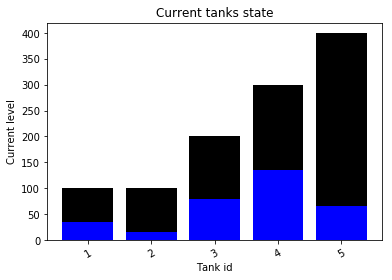

In [4]:
# Simulation
%matplotlib inline

seed = None 

iterations = 50
visualization_steps = []
rewards_list = []

for it in range(iterations):
    rewards = toy_system.random_action(seed);
    rewards_list.append(rewards)
    #print(toy_system.state())
    print("Final rewards: ", rewards);
    toy_system.reset_trucks_positions();
    visualization_steps.append(toy_system.visualize());

In [5]:
visualization_steps[0][2]

[40.0, 50.0, 120.0, 140.0, 315.0]

In [6]:
visualization_steps[0][0]+1

array([1, 2, 3, 4, 5])

In [7]:
visualization_steps;

In [8]:
def create_system_animation(visualization_steps, n_iterations, skip = 1):
    
    def barlist(n, visualization_steps = visualization_steps): 
        return visualization_steps[n][2]

    fig=plt.figure()

    N=int(n_iterations/skip) #Number of frames
    x=visualization_steps[0][0]+1

    plt.bar(x,visualization_steps[0][1], color = 'black')
    barcollection = plt.bar(x,barlist(0), color = 'blue')

    def animate(i):
        y=barlist(i+1)
        for i, b in enumerate(barcollection):
            b.set_height(y[i])

    anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=N-1,
                                 interval=100)
    return(anim)
    #anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
    #plt.show()

In [9]:
#toy_system.visualize_step(visualization_steps[2]);

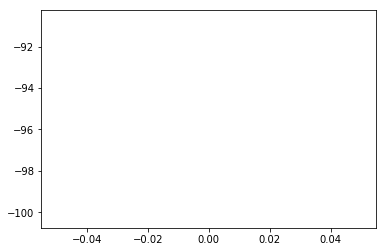

In [10]:
%matplotlib inline
plt.plot(range(iterations),rewards_list)

In [11]:
toy_system.n_states()

3600000

In [12]:
n_s = ((n+1)**k)
a = np.prod(n_discrete_load_levels)
b = np.prod(n_discrete_load_levels_trucks)
n_s = n_s *a *b
n_s

3600000

# Small system to apply Q-learning algorithm


In [13]:
def initialize_test_system():
    
    # Tanks' information
    global n
    n = 5 
    tank_ids = list(range(1,n+1))
    tank_max_loads =  np.array([100., 100., 200., 300., 400.])
    #tank_current_loads =  np.array([50., 60., 120., 150., 300.])
    tank_current_loads = tank_max_loads.copy()
    tank_consumption_rates =  np.array([5.] * n)
    
    global n_discrete_load_levels
    n_discrete_load_levels = np.array([4,4,4,4,4])

    # Trucks' information
    global k
    k = 2
    truck_ids = list(range(k))
    truck_max_loads = np.array([20., 50.])
    truck_current_loads = truck_max_loads.copy()
    truck_current_positions =  np.array([5] * k)
    #truck_fractions_deliverable =  np.array([1.] * k) # we for now we only allow to deliver all the content of the truck
    truck_fractions_deliverable =  np.array([ np.array([0.5, 1.]), 
                                              np.array([0.5, 1.])
                                            ]) # we for now we only allow to deliver all the content of the truck
    global n_discrete_load_levels_trucks
    n_discrete_load_levels_trucks = np.array([2,2])

    # System's information
    def simple_graph(n: int):    
        A = np.zeros((n,n))
        A[(n-1),0:n] = 1
        A = A.astype(int)
        return(A)

    graph = simple_graph(n+1)
    tanks = [tank.Tank( tank_id, current_load, max_load, consumption_rate, n_lvls) 
             for  tank_id, current_load, max_load, consumption_rate, n_lvls in 
             zip( tank_ids, tank_current_loads, tank_max_loads, tank_consumption_rates, n_discrete_load_levels)]
    trucks = [truck.Truck( truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls) 
             for  truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls in 
             zip(truck_ids, truck_current_loads, truck_max_loads, truck_current_positions, 
                 truck_fractions_deliverable, n_discrete_load_levels_trucks)]

    def simple_weights(n: int, w: float):    
        W = np.full((n,n), np.inf)
        W[(n-1),:] = w
        return(W)
    #w =  np.array([0, 20., 10., 30., 50.5, 45.])
    w =  np.array([0., 20., 20., 20., 20., 20.])

    weights_matrix = simple_weights(n+1, w)
    
    return(tanks, trucks, graph, weights_matrix)

tanks, trucks, graph, weights_matrix = initialize_test_system()
toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

print(toy_system.weights)

a_s_dim = toy_system.states_dim * toy_system.actions_dim
a_s_dim

[[ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [  0.  20.  20.  20.  20.  20.]]


1474560

In [14]:
toy_system.graph[5]

array([1, 1, 1, 1, 1, 1])

In [15]:
toy_system.discrete_state()



rewards = toy_system.random_action(seed);
rewards_list.append(rewards)
#prnt(toy_system.state())
print("Final rewards: ", rewards);
toy_system.reset_trucks_positions();

toy_system.da

Final rewards:  -inf


[[4, 0], [1, 1]]

In [16]:
toy_system.ds

[[5, 5], [1, 1], [3, 3, 3, 3, 3]]

In [17]:
a = [[3, 4], [1, 1], [0, 0, 1, 0, 1]]
aa= ''.join(str(''.join(str(y) for y in x)) for x in a)

In [18]:
print(toy_system.ds)
print(toy_system.da)

[[5, 5], [1, 1], [3, 3, 3, 3, 3]]
[[4, 0], [1, 1]]


In [19]:
sa_new = toy_system.state_action_to_string()
sa_new

'5511333334011'

In [20]:
new_dict = {}
new_dict[sa_new] = {"qval": 1}

In [21]:
new_dict[sa_new]['qval']

1

## Off-policy algorithm (Train)

In [22]:
learning_rate0 = 0.05
learning_rate_decay = 0.1
n_iterations = 2*10**6
discount_rate = 0.8

tanks, trucks, graph, weights_matrix = initialize_test_system()
toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

Q = {}

def is_key(dic, key):
    if key in dic:
        return(True)
    else: return(False)

is_key(new_dict, sa_new)

state_length = 2*k + n

In [23]:
import pickle

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [24]:
# "Train zone". Q-values are being converging to the optimal, theoretically

train = False
if train:

    visualization_steps = []
    rewards_list = []

    verbose = False
    verbose_info = True

    for iteration in range(n_iterations):
        toy_system.update_state() 

        if verbose: print("System state before, ", toy_system.ds)

        reward = toy_system.random_action(seed = None, verbose = verbose)
        sa_current = toy_system.state_action_to_string()

        if is_key(Q, sa_current) == False:
            Q[sa_current] = 0

        learning_rate = learning_rate0 / (1+iteration*learning_rate_decay)

        Q_max = max([Q[key] for key in Q.keys() if key.startswith(sa_current[0:state_length])])
        
        if Q[sa_current] != -np.inf:
            Q[sa_current] = ( (1-learning_rate) * Q[sa_current] 
                             + learning_rate* (reward + discount_rate * Q_max)
                            )
        if verbose:
            print("System state after, ", toy_system.ds)
            print("System action after, ", toy_system.da)
            print("sa current, ", sa_current)

        toy_system.reset_trucks_positions();
        toy_system.reset_trucks_loads();

        if iteration % 10000 == 0:
            print("Iteration ", iteration)
            if verbose_info:
                print("s, a", toy_system.s, toy_system.a)
                print("ds, da", toy_system.ds, toy_system.da)
                
            #Save visualization and rewards
            rewards_list.append(rewards);
            visualization_steps.append(toy_system.visualize());    

            save_obj(Q, "Q-dict-test-" + f"{iteration}")   
            save_obj(visualization_steps, "vis/vis-train-test-" + f"{iteration}")   
            save_obj(rewards_list, "rewards/rew-train-test-" + f"{iteration}")   




    save_obj(Q, "Q-dict-test-" + f"{iteration}")   
    save_obj(visualization_steps, "vis-train-test-" + f"{iteration}")   
    save_obj(rewards_list, "rew-train-test-" + f"{iteration}")   


In [25]:
(0.1)*np.inf
#[key for key in list(Q) if key.startswith('5')]

inf

In [26]:
# Optimal policy using the Q values trained previously:
# Q = load_obj("Q-dict-test-"+f'{n_iterations-1}')
# #print(Q.keys())

# rewards_l = load_obj('rewards/rew-train-test'+f'{n_iterations}')
# vis_l = load_obj('vis/vis-train-test-'+f'{n_iterations}')

# anim = create_system_animation(vis_l, n_iterations)
# HTML(anim.to_html5_video())

In [27]:


new_keys = new_dict.keys()

In [28]:
#[Q[key] for key in new_keys if key.startswith(sa_new[0:2])]

In [29]:
toy_system.ds

[[5, 5], [1, 1], [3, 3, 3, 3, 3]]

In [30]:
toy_system.da

In [31]:
max([1,2,3])

3

In [32]:
[1,2,3][0:3]

[1, 2, 3]

In [33]:
#Q['3311-1-1']

In [34]:
test_toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)


### To do

1. Función que permita aplicar una acción al sistema usando el código de números enteros (como en las keys de los dicts)

2. Hacer una simulación que vaya aplicando, en cada estado, la accion con mayor Q-value en el diccionario Q.

3. Visualizar como evoluciona el sistema con la optimal policy estimada con alguna random

In [35]:
test_toy_system.n

5

In [36]:
a = '1234'

In [37]:
for element in a: 
    print(element)

1
2
3
4


In [38]:
a[0:2]

'12'

### Testing deterministic_action function from System class

In [39]:
tanks, trucks, graph, weights_matrix = initialize_test_system()
test_toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)
test_toy_system.ds

[[5, 5], [1, 1], [3, 3, 3, 3, 3]]

In [40]:
# Test example:
# System state before,  [[0, 0], [1, 1], [0, 0, 1, 0, 1]]
# System state after,  [[0, 0], [1, 1], [0, 0, 1, 0, 1]]
# System action after,  [[3, 0], [0, 1]]
# sa current,  0011001013001

s0 = '001100101'
a0 = '3001'

In [41]:
int('1')

1

In [42]:
test_toy_system.set_discrete_state(s0)
test_toy_system.ds

[[0, 0], [1, 1], [0, 0, 1, 0, 1]]

In [43]:
test_toy_system.deterministic_action(a0)

-80.0

In [44]:
toy_system.update_state() 


In [45]:
test_toy_system.da

[[3, 0], [0, 1]]

In [46]:

test_toy_system.ds

[[0, 0], [1, 1], [0, 0, 1, 0, 1]]

In [47]:
200000/3600

55.55555555555556

### Visualize simulation of 900 train steps

In [48]:
verbose_vis = False

if verbose_vis:

    n_iterations = 900

    Q = load_obj("Q-dict-test-"+f'{n_iterations}')
    #print(Q.keys())

    rewards_l = load_obj('rewards/rew-train-test-'+f'{n_iterations}')
    vis_l = load_obj('vis/vis-train-test-'+f'{n_iterations}')

    anim = create_system_animation(vis_l, n_iterations)
    HTML(anim.to_html5_video())

In [49]:
#each 9 frames
if verbose_vis:
    anim = create_system_animation(vis_l, n_iterations, 9)
    HTML(anim.to_html5_video())

## Off-policy algorithm (Optimal policy from the trained Q-values)

In [50]:
# Initialize system
tanks, trucks, graph, weights_matrix = initialize_test_system()

# Load trained Q-values
n_iterations = 900
Q = load_obj("Q-dict-test-"+f'{n_iterations}')

test_toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)
a0 = '3001'
s0 = test_toy_system.state_to_string()
print(s0)
test_toy_system.deterministic_action(a0)

print(test_toy_system.ds)
print(test_toy_system.state_to_string())
print(test_toy_system.da)
print(test_toy_system.action_to_string())

print(test_toy_system.state_action_to_string())

551133333
[[5, 5], [1, 1], [3, 3, 3, 3, 3]]
551133333
[[3, 0], [0, 1]]
3001
5511333333001


In [51]:
# Way to access to the keys of the dictionary Q
key_index = 0
i = list(Q)[key_index]
#Q value:
Q[i]

-0.066500000000000004

In [52]:
s0_keys = [key for key in list(Q) if key.startswith(s0)][1:10]
s0_keys

[]

In [53]:
s0_q = [Q[s0_key] for s0_key in s0_keys]
print(s0_q)
print(s0_q == max(s0_q))
optimal_key_index = np.where(np.isin(s0_q, max(s0_q)))[0][0]
optimal_key = s0_keys[optimal_key_index]
print(optimal_key)

optimal_action = optimal_key[toy_system.state_length:]


[]


ValueError: max() arg is an empty sequence

In [54]:
# Given a state, returns the action that has the highest Q-value.

def optimal_policy(state, Q):
    """
    state must be in the string-integers code
    """
    state_keys = [key for key in list(Q) if key.startswith(s0)]
    if len(state_keys) == 0:
        return(None)
    
    state_q = [Q[state_key] for state_key in state_keys]
    
    #print("state_q ", state_q[1:min(10,len(state_q))])
    
    max_q = max(state_q)
    #print("max_q", max_q)
    optimal_key_index = np.where(np.isin(state_q, max_q ))[0][0]
   #print("optimal_key_index", optimal_key_index)
    optimal_key = state_keys[optimal_key_index]
    #print("optimal_key", optimal_key)
    
    optimal_action = optimal_key[toy_system.state_length:]
    
    return(optimal_action)
    

In [55]:
optimal_policy(s0, Q)

### Test optimal policy with a small simulation

In [59]:
# Initialize system
tanks, trucks, graph, weights_matrix = initialize_test_system()

# Load trained Q-values
n_iterations = 1999999
Q = load_obj("Q-dict-test-"+f'{n_iterations}')


# 20k
#Q = load_obj("Q-dict-test-20k")
#n_iterations = 20000

sim_iterations = 1000
test_toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

In [ ]:
test = True
visualization_steps = []
rewards_list = []


if test:
    for i in range(sim_iterations):
        #print("state", test_toy_system.s, test_toy_system.ds)
        test_toy_system.update_state()
        visualization_steps.append(test_toy_system.visualize());
    
        s0 = test_toy_system.state_to_string()
        best_action = optimal_policy(s0, Q)
        #print("best_action", best_action)
        
        if best_action == None:
            print("Random action is performed, because the current state is unknown for the trained Q")
            test_toy_system.random_action()
        
        else:
            reward = test_toy_system.deterministic_action(best_action)
            print(i,reward, best_action)
        
        test_toy_system.reset_trucks_positions();
        test_toy_system.reset_trucks_loads();

        
        
        #Save visualization and rewards
        rewards_list.append(reward);


0 -85.0 2210
1 -85.0 2210
2 -85.0 2210
3 -85.0 2210
4 -85.0 2210
5 -85.0 2210
6 -85.0 2210
7 -85.0 2210
8 -85.0 2210
9 -85.0 2210
10 -80.0 0101
11 -85.0 2210
12 -70.0 0011
13 -85.0 2210
14 -85.0 2210
15 -85.0 2210
16 -85.0 2210
17 -85.0 2210
18 -85.0 2210
19 -85.0 2210
20 -40.0 5500
21 -40.0 5500
22 -50.0 1500
23 -50.0 1500
24 -50.0 1500
25 -60.0 3510
26 -inf 1500
27 -30.0 0500
28 -inf 1500
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
31 -90.0 2011
32 -85.0 2210
33 -40.0 5500
34 -50.0 1500
35 -50.0 1500
36 -50.0 1500
37 -50.0 1500
38 -inf 1500
39 -30.0 0500
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
42 -85.0 3310
43 -40.0 5500
44 -inf 5500
45 -inf 0500
Random action is performed, because the current state is unknown for the trained Q
47 -inf 0500

Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Rand

Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
364 -30.0 0500
365 -40.0 5500
Random action is performed, because the current state is unknown for the trained Q
367 -30.0 0500
368 -30.0 0500
Random action is performed, because the current state is unknown for the trained Q
370 -75.0 1400
371 -110.0 4111
372 -110.0 4111
373 -55.0 0300
374 -55.0 0300
375 -45.0 0010
Random action is performed, because the current state is unknown for the trained Q
377 -75.0 3300
378 -85.0 3310
379 -85.0 3310
380 -inf 4000
381 -85.0 2310
382 -60.0 1510
383 -60.0 4510
384 -inf 3310
385 -75.0 2200
386 -30.0 0500
387 -30.0 0500
388 -60.0 1510
389 -55.0 4000
390 -60.0 1510
391 -inf 4510
392 -inf 4500
393 -85.0 2310
394 -30.0 0500
395 -inf 1510
396 -inf 1510
397 -inf 1510
398 -inf 3500
399 -inf 3500
400 -inf 3500
Random action is performed, because the current state is unknown for the trained Q


619 -90.0 1011
620 -90.0 1011
621 -90.0 1011
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q
630 -50.0 1500
631 -50.0 1500
632 -50.0 1500
633 -55.0 4000
634 -55.0 4000
635 -85.0 4410
636 -85.0 4410
637 -75.0 2200
638 -40.0 0510
639 -55.0 0300
640 -60.0 1510
641 -75.0 2200
642 -60.0 1510
643 -55.0 0200
644 -90.0 1011
645 -90.0 1011
646 -90.0 1011
647 -90.0 1011
648 -90.0 1011
649 -9

Random action is performed, because the current state is unknown for the trained Q
Random action is performed, because the current state is unknown for the trained Q


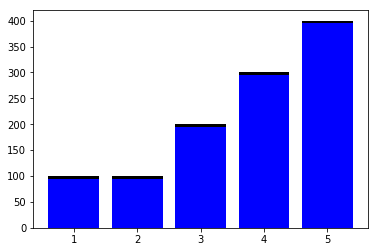

In [58]:
rewards_l = rewards_list
vis_l = visualization_steps

anim = create_system_animation(vis_l, sim_iterations,1)
HTML(anim.to_html5_video())

In [ ]:
max(-np.inf,-10)

In [ ]:
Q['001101101'+ '0010']


In [ ]:
plt.plot([i for i in range(len(rewards_list))],rewards_list)
plt.show()

In [ ]:
Q


In [ ]:
a = -np.inf

In [ ]:
a == -np.inf

In [ ]:
len([key for key in list(Q) if key.startswith(s0)])

In [ ]:
list(Q)

In [ ]:
np.linspace(0,3,3)

In [ ]:
#list(Q)

In [ ]:
old_position = 5
possible_positions_index = np.isin(test_toy_system.graph[old_position], 1)
possible_positions = np.where(possible_positions_index)
possible_positions

In [ ]:
new_position = random.randrange(len(possible_positions_index)-1 )
new_position
len(possible_positions_index)-1

In [ ]:
1474560/(n+1)**k

In [ ]:
 2*10**6